<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_6/NN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from matplotlib import style
plt.style.use('seaborn-talk')


In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    a = 1 / (1 + np.exp(-x))
    return a*(1-a) 


def relu(x):
    return np.maximum(0,x)

## Input cannot be a list, it has to be either a number or a numpy array. 
def d_relu(x):
    return x>0


# Implement your own code for NN

Now we want to do this ourselves, not using the optimizer. 

We will use a simple GD algorithm which basically does the following:

w_1  -> w_1 - alpha * dL/dw_1

w_2  -> w_2 - alpha * dL/dw_2

In [0]:
'''
We need to define our loss function for training. 
We use the cross-entropy. 
'''

def cross_entropy(y, a):
    ns = len(y)
    if y.shape==a.shape:
        return np.sum( -y*np.log(a)- (1-y)*np.log(1-a) )/ ns
    else:
        print('Double check the dimensions, y is of the form {}, where as y_predicted is {}'.format(y.shape, a.shape)  )


In [0]:
'''
The same as log_reg_predict. The only difference is that 
we let it take the activation function as an input. 
Also note that here, x is not neccessarily the input, but 
could be the output of any of the previous layers. 
'''
def single_layer(x, w, b ,  activation_func=(lambda x: sigmoid(x)  ) ):
    
    return z , a

'''
We now define our general neural network function. 

The input shapes are
x: (n_s, n_f)
w_list: {w_l :  ( n_(l), n_(l-1) ) }
b_list: {b_l :  (     1  , n_l ) }

We return both z and a in all the layers for the output. 
This could be too much for a real data!!

'''
def feed_forward(x, w_list, b_list, activation_func_list=[(lambda x: sigmoid(x))]  ):
    a = x
    z_list = []
    a_list = [a]
      
    return a_list, z_list


In [0]:
'''
This will make a random network based on the nodes in each layer.
The inputs are
nl_list = [n_f, n_l1, n_l2, ..., n_c]: with n_li the number of nodes in layer i. 

We could add 
activation_func_list = [act_func_1, act_func_2, ... ]
But for now, we keep it simple. 

'''

def random_network_generator( nl_list ):
    w_list = []
    b_list = []
    for i in range(len(nl_list)-1 ):
        w_list += [ np.random.uniform(-1,1,size=[nl_list[i+1] , nl_list[i] ]) ]
        b_list += [ np.random.uniform(-1,1,size=[1 , nl_list[i+1] ]) ]
    return w_list, b_list

In [0]:
'''
For each step of Back Propagation, we need the followings:

'''
def single_bp(W, Z, A, dA_in, df):

    return dW, dB, dA_out
    

In [0]:
'''
This would implement the single_bp from the end of the NN to the begining 
layer by layer. 
dA_f is the dA for the last layer, which depends on the loss function and 
the labels, y as well as the activation function of the last/output layer. 
'''
def back_propagation(W_list, Z_list, A_list, dA_f, df_list=[(lambda x:1)]):
    
    ### Stuff to return
    dW_list = []
    dB_list = []
       
    return dW_list[::-1], dB_list[::-1]


In [0]:
def train_NN(X, Y, nl_list, activation_func_list=[ [sigmoid, d_sigmoid] ]  , n_itr=10):

    print('Initialization ...')
    w_list, b_list = random_network_generator(nl_list)
    dw_list = [np.zeros(shape=w.shape) for w in w_list]
    db_list = [np.zeros(shape=b.shape) for b in b_list]

    a_list, z_list = feed_forward(X, w_list, b_list, f_list) 

    loss_tracker = [cross_entropy(Y, a_list[-1] ) ]

    da_f = (a_list[-1]-Y)/(a_list[-1]*(a_list[-1]-1))

    for j in range(n_itr):
        dw_list, db_list = back_propagation(w_list, z_list, a_list, da_f, df_list)

        for i in range(d-1):
            w_list[i] += .01 * dw_list[i]
            b_list[i] += .01 * db_list[i]

        
        
        da_f = (a_list[-1]-Y)/(a_list[-1]*(a_list[-1]-1))

      
    return w_list, b_list, loss_tracker


In [0]:
n_s = 1000  # number of samples
n_outputs = 1
n_f = 2
n_l = [n_f, 5, 6, n_outputs ]

x = np.random.uniform(-1,1,size=[n_s,n_f])

w_list, b_list = random_network_generator(n_l)

a_list = [[relu, d_relu],[relu, d_relu], [sigmoid, d_sigmoid] ] 
# a_list = [[sigmoid, d_sigmoid],[sigmoid, d_sigmoid], [sigmoid, d_sigmoid] ] 
f_list  = [ a[0] for a in a_list ] 

y_actual = feed_forward(x, w_list, b_list, f_list)[0][-1]

ws, bs, loss = train_NN( x , y_actual , n_l , n_itr=10000, activation_func_list=a_list )
plt.plot(  loss  )

# With Keras

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import requests
import io

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

In [6]:
print('Each image is of the form: {}'.format(X[0].shape ) )

Each image is of the form: (32, 32)


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [10]:
history = model.fit(X_train,Y_train, epochs=5)

Epoch 1/5
76764/76764 [==============================] - 10s 130us/sample - loss: 0.1367 - acc: 0.9605
Epoch 2/5
76764/76764 [==============================] - 9s 122us/sample - loss: 0.0513 - acc: 0.9848
Epoch 3/5
76764/76764 [==============================] - 9s 120us/sample - loss: 0.0319 - acc: 0.9905
Epoch 4/5
76764/76764 [==============================] - 9s 121us/sample - loss: 0.0223 - acc: 0.9928
Epoch 5/5
76764/76764 [==============================] - 9s 120us/sample - loss: 0.0164 - acc: 0.9946


In [11]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

[[2529    0    0    0    2    5    0    0    0    0]
 [   1 2498    5    0    3    0    1    0    0    3]
 [   1    3 2456   19   17    0    3    0    0    1]
 [   2    0   48 2467   27    0    0    0    0    0]
 [   2    2    6   42 2630    4    4    1    0    1]
 [  13    0    2    1    7 2469    1    0    4    0]
 [   1    1    8    0    5    1 2565    2    1   24]
 [   2    2   24    2    4    2    4 2568    0    0]
 [   0    3    1    0    1    6    7    1 2522    7]
 [   0    4    3    0    3    0    7    0    7 2520]]


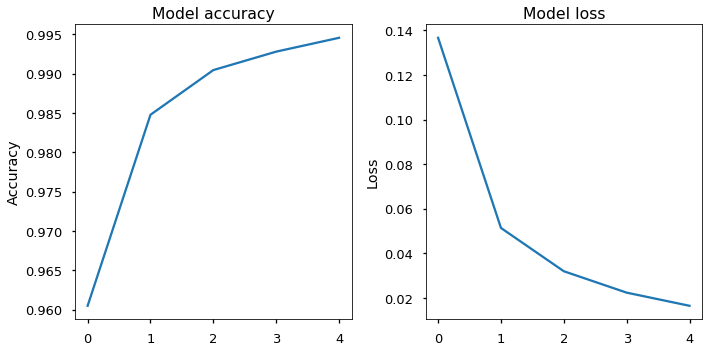

In [12]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])

plt.tight_layout()
plt.show()

In [13]:
Y_oh = keras.utils.to_categorical(Y, num_classes=10, dtype=int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
Y_oh[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [14]:
history = model.fit(X_train,Y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Train on 57573 samples, validate on 19191 samples
Epoch 1/10
57573/57573 [==============================] - 23s 393us/sample - loss: 0.0203 - acc: 0.9931 - val_loss: 0.0207 - val_acc: 0.9929
Epoch 2/10
57573/57573 [==============================] - 25s 430us/sample - loss: 0.0127 - acc: 0.9958 - val_loss: 0.0265 - val_acc: 0.9920
Epoch 3/10
57573/57573 [==============================] - 26s 444us/sample - loss: 0.0110 - acc: 0.9963 - val_loss: 0.0269 - val_acc: 0.9923
Epoch 4/10
57573/57573 [==============================] - 26s 456us/sample - loss: 0.0102 - acc: 0.9966 - val_loss: 0.0306 - val_acc: 0.9915
Epoch 5/10
57573/57573 [==============================] - 27s 474us/sample - loss: 0.0088 - acc: 0.9974 - val_loss: 0.0250 - val_acc: 0.9930
Epoch 6/10
57573/57573 [==============================] - 27s 464us/sample - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0400 - val_acc: 0.9903
Epoch 7/10
57573/57573 [==============================] - 25s 429us/sample - loss: 0.0077 - acc: 0.9973 

In [15]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

[[2515    0    0    0    1   16    1    3    0    0]
 [   0 2503    2    0    1    0    0    0    0    5]
 [   0    9 2440   24    6    0    5    6    0   10]
 [   0    0   47 2469   21    3    1    1    0    2]
 [   1    6   14   33 2614    8    5    3    1    7]
 [   5    1    1    0    1 2485    1    1    2    0]
 [   1    3    2    0    4    4 2553    6    0   35]
 [   2    3    2    2    3    1    6 2589    0    0]
 [   0    5    0    0    1    4    0    0 2530    8]
 [   0    6    1    0    0    0   10    0    2 2525]]


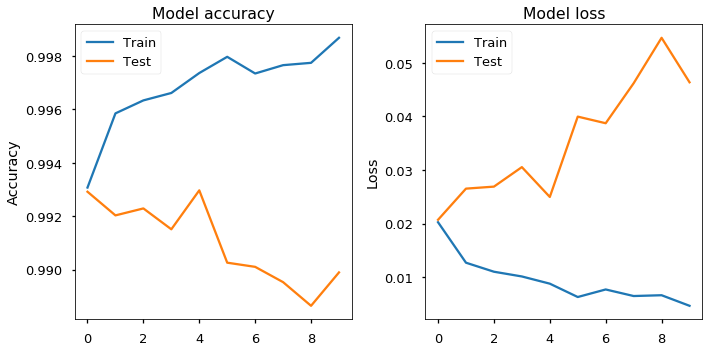

In [16]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()